In [215]:
import pandas as pd

In [216]:
df = pd.read_csv("caloriesburnt.csv")

In [217]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190,94,29,105,40.8,231
1,14861698,female,20,166,60,14,94,40.3,66
2,11179863,male,69,179,79,5,88,38.7,26
3,16180408,female,34,179,71,13,100,40.5,71
4,17771927,female,27,154,58,10,81,39.8,35


In [218]:
df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [219]:
df.shape

(15000, 9)

In [220]:
df.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  int64  
 4   Weight      15000 non-null  int64  
 5   Duration    15000 non-null  int64  
 6   Heart_Rate  15000 non-null  int64  
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 1.0+ MB


In [222]:
df["Gender"].value_counts()

Gender
female    7553
male      7447
Name: count, dtype: int64

In [223]:
import plotly.express as px
import matplotlib.pyplot as plt

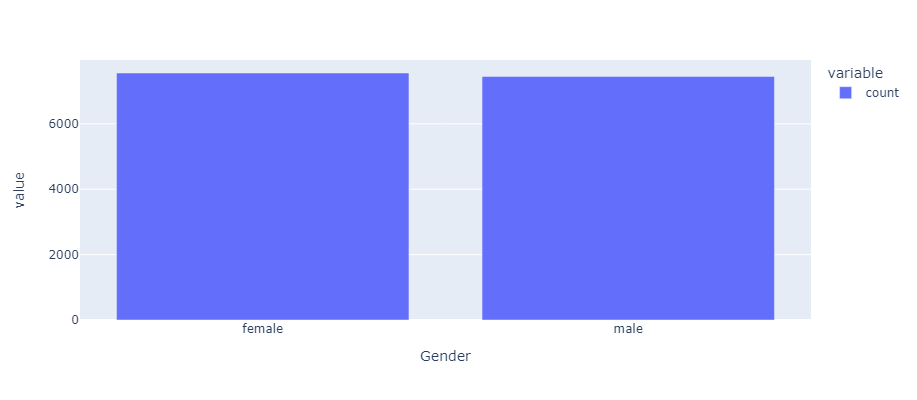

<Figure size 500x500 with 0 Axes>

In [224]:
plt.figure(figsize=(5, 5))
px.bar(df['Gender'].value_counts(), width=500, height = 400)

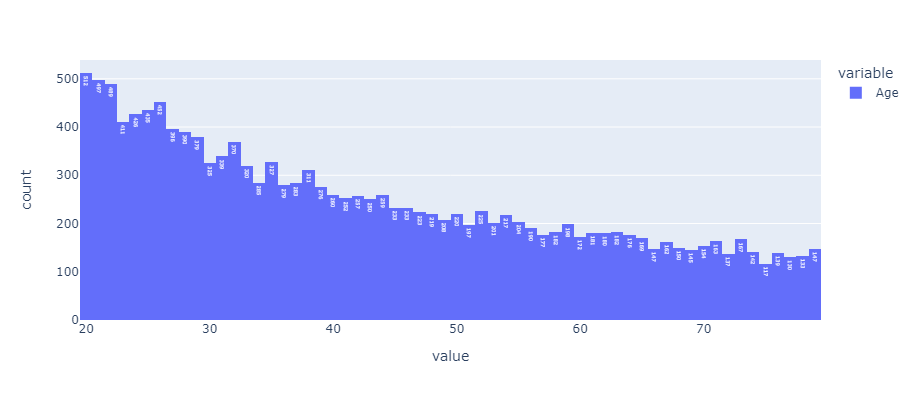

In [225]:
px.histogram(df['Age'], width=1000, height=400, text_auto=True)

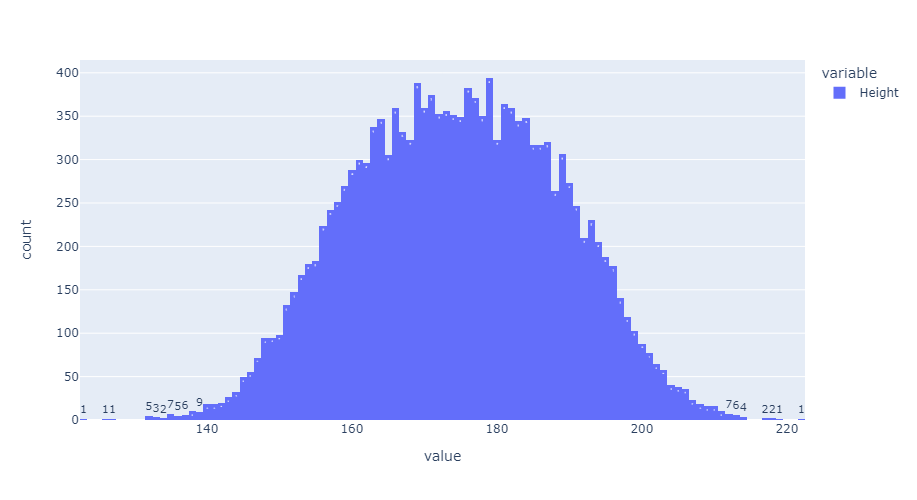

In [226]:
px.histogram(df['Height'], width=1000, height=500, text_auto=True)

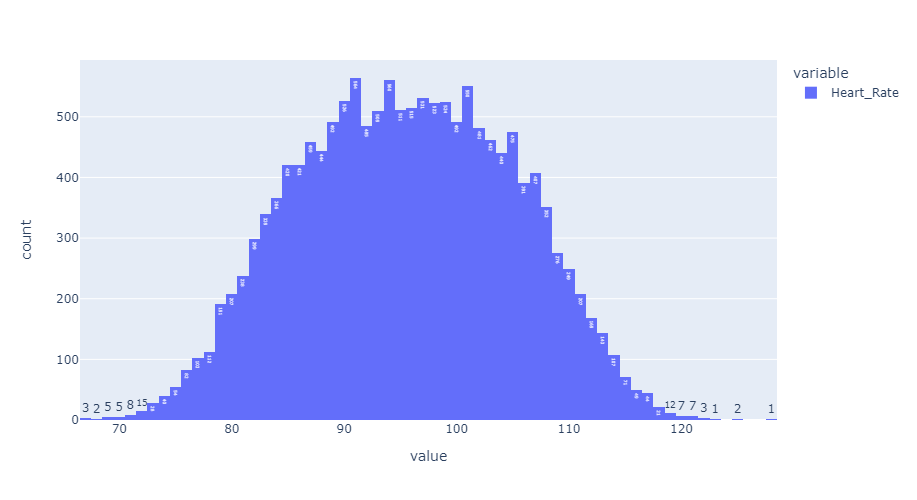

In [227]:
px.histogram(df['Heart_Rate'], width=1000, height=500, text_auto=True)

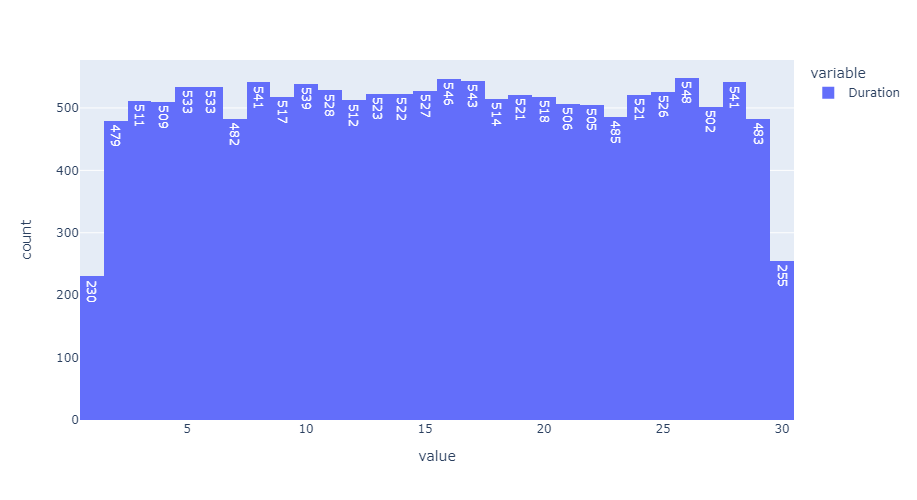

In [228]:
px.histogram(df['Duration'], width=1000, height=500, text_auto=True)

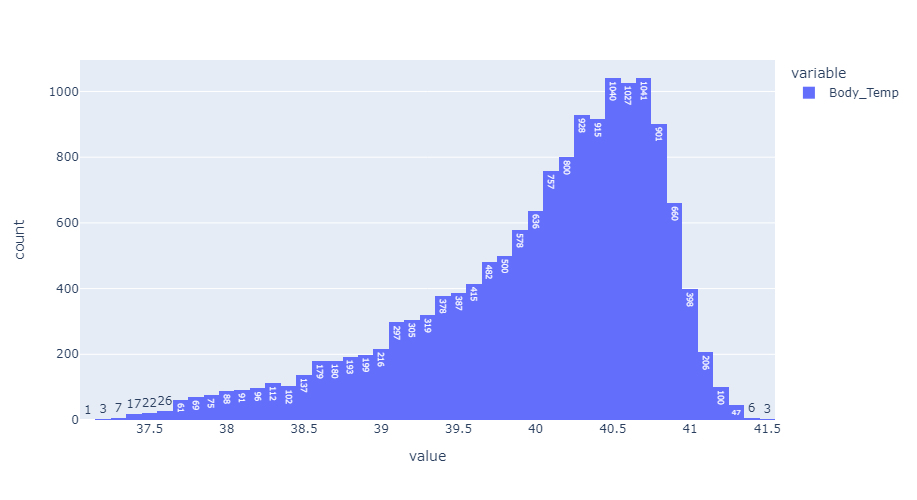

In [229]:
px.histogram(df['Body_Temp'], width=1000, height=500, text_auto=True)

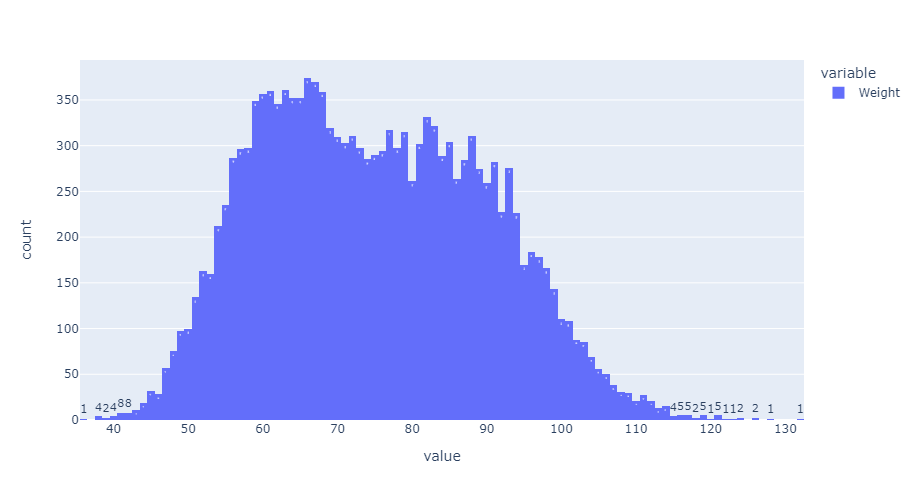

In [230]:
px.histogram(df['Weight'], width=1000, height=500, text_auto=True)

In [231]:
df.iloc[:, 2:]

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,68,190,94,29,105,40.8,231
1,20,166,60,14,94,40.3,66
2,69,179,79,5,88,38.7,26
3,34,179,71,13,100,40.5,71
4,27,154,58,10,81,39.8,35
...,...,...,...,...,...,...,...
14995,20,193,86,11,92,40.4,45
14996,27,165,65,6,85,39.2,23
14997,43,159,58,16,90,40.1,75
14998,78,193,97,2,84,38.3,11


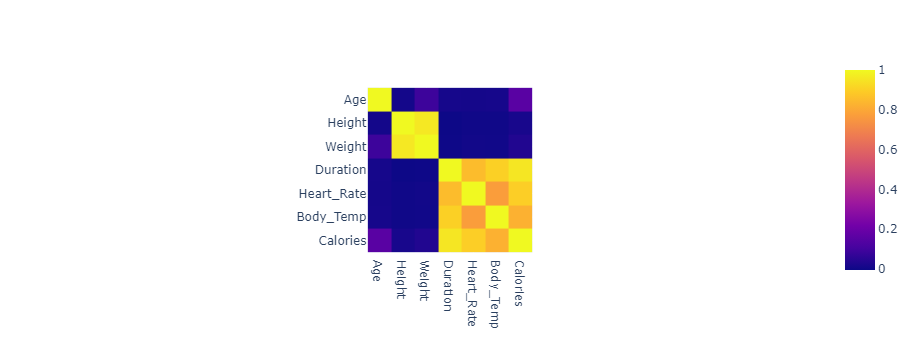

In [232]:
px.imshow(df.iloc[:, 2:].corr())

In [233]:
df.replace({'Gender':{'male':1, 'female':0}}, inplace = True)
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,1,68,190,94,29,105,40.8,231
1,14861698,0,20,166,60,14,94,40.3,66
2,11179863,1,69,179,79,5,88,38.7,26
3,16180408,0,34,179,71,13,100,40.5,71
4,17771927,0,27,154,58,10,81,39.8,35


## Spliting features and label

In [234]:
y = df['Calories']
X = df.drop(columns = ['Calories', 'User_ID'])

## Train Test Split

In [235]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

X_train.shape, X_test.shape

((12000, 7), (3000, 7))

In [236]:
y_train.shape, y_train.shape

((12000,), (12000,))

## Building the model, evaluating the model, and making predictions

In [237]:
from xgboost import XGBRegressor
xgbr = XGBRegressor()
xgbr.fit(X_train, y_train)
xgbr_prediction = xgbr.predict(X_test)

In [238]:
from sklearn.metrics import mean_absolute_error as mae, r2_score as r2
xgbr_mae = mae(y_test, xgbr_prediction)

xgbr_r2 = r2(y_test, xgbr_prediction)

In [239]:
print(xgbr_mae)

print(xgbr_r2)

1.4849313759878278
0.9988308899957399


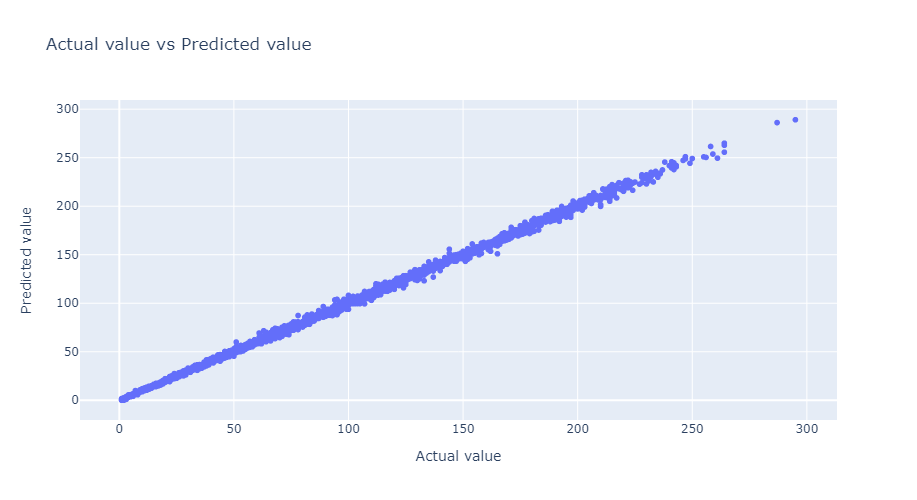

In [240]:
px.scatter(x = y_test, y = xgbr_prediction, labels = {'y':'Predicted value', 'x':'Actual value'}, title = 'Actual value vs Predicted value', height = 500, width = 1000)

###### The graph is linear so, this model can predict values close to the actual values

In [243]:
result = pd.DataFrame({'Actual value':y_test, 'Predicted value':xgbr_prediction})
result.head(15).round(2)

,Actual value,Predicted value
6958,123,123.449997
7534,5,4.840000
2975,60,61.160000
3903,10,10.440000
8437,20,19.740000
6812,67,72.220001
1567,94,95.269997
14680,165,159.050003
10189,12,12.830000
14380,12,11.920000
